![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

# DATA PROCESSING AND EXPLORATION

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `bees_num` | The total number of bee individuals in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plot. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

In [41]:
column_description = {
    "sample_id": "The ID number of the sample taken.",
    "bees_num": "The total number of bee individuals in the sample.",
    "date": "Date the sample was taken.",
    "season": "Season during sample collection ('early.season' or 'late.season').",
    "site": "Name of collection site.",
    "native_or_non": "Whether the sample was from a native or non-native plot.",
    "sampling": "The sampling method.",
    "plant_species": "The name of the plant species the sample was taken from. None indicates the sample was taken from the air.",
    "time": "The time the sample was taken.",
    "bee_species": "The bee species in the sample.",
    "sex": "The gender of the bee species.",
    "specialized_on": "The plant genus the bee species preferred.",
    "parasitic": "Whether or not the bee is parasitic (0:no, 1:yes).",
    "nesting": "The bees nesting method.",
    "status": "The status of the bee species.",
    "nonnative_bee": "Whether the bee species is native or not (0:no, 1:yes)."
}
column_description

{'sample_id': 'The ID number of the sample taken.',
 'bees_num': 'The total number of bee individuals in the sample.',
 'date': 'Date the sample was taken.',
 'season': "Season during sample collection ('early.season' or 'late.season').",
 'site': 'Name of collection site.',
 'native_or_non': 'Whether the sample was from a native or non-native plot.',
 'sampling': 'The sampling method.',
 'plant_species': 'The name of the plant species the sample was taken from. None indicates the sample was taken from the air.',
 'time': 'The time the sample was taken.',
 'bee_species': 'The bee species in the sample.',
 'sex': 'The gender of the bee species.',
 'specialized_on': 'The plant genus the bee species preferred.',
 'parasitic': 'Whether or not the bee is parasitic (0:no, 1:yes).',
 'nesting': 'The bees nesting method.',
 'status': 'The status of the bee species.',
 'nonnative_bee': 'Whether the bee species is native or not (0:no, 1:yes).'}

In [42]:
import pandas as pd
data = pd.read_csv("data/plants_and_bees.csv")
data

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


In [43]:
# Start coding 
data.shape

(1250, 16)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       1250 non-null   int64  
 1   bees_num        1250 non-null   int64  
 2   date            1250 non-null   object 
 3   season          1250 non-null   object 
 4   site            1250 non-null   object 
 5   native_or_non   1250 non-null   object 
 6   sampling        1250 non-null   object 
 7   plant_species   1250 non-null   object 
 8   time            1250 non-null   int64  
 9   bee_species     1250 non-null   object 
 10  sex             1250 non-null   object 
 11  specialized_on  7 non-null      object 
 12  parasitic       1187 non-null   float64
 13  nesting         1196 non-null   object 
 14  status          15 non-null     object 
 15  nonnative_bee   1189 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 156.4+ KB


In [45]:
data.isnull().sum()

sample_id            0
bees_num             0
date                 0
season               0
site                 0
native_or_non        0
sampling             0
plant_species        0
time                 0
bee_species          0
sex                  0
specialized_on    1243
parasitic           63
nesting             54
status            1235
nonnative_bee       61
dtype: int64

In [46]:
#Missing Values %
#obtaining % of missing values per variable
missing_values_percent = data.isnull().sum()/1250*100
missing_values_percent

sample_id          0.00
bees_num           0.00
date               0.00
season             0.00
site               0.00
native_or_non      0.00
sampling           0.00
plant_species      0.00
time               0.00
bee_species        0.00
sex                0.00
specialized_on    99.44
parasitic          5.04
nesting            4.32
status            98.80
nonnative_bee      4.88
dtype: float64

# DATA CLEANING

Data Cleaning Task:
1. Remove variable 'specialized_on' and 'status'. More than 95% values in both variables are null values accounts for, there issuficient data, limiting tecquines to treat null values and draw valuable insights.
2. Fill null values for parasictic, nesting, nonative variables using by imputation of most freque value and creating a new category
3. Change date and time variable datatype to datetime
4. Change parasitic and nonative datatype to interger.
5. Create binary columns
6. Save processed and clean data

**Null Values**

In [47]:
# Remove 'specialized_on' and 'status' columns from the 'data' dataframe
data.drop(['specialized_on', 'status'], axis=1, inplace=True)

In [48]:
#Count the number of occurrences of each unique value in the 'parasitic' column
data['parasitic'].value_counts()

0.0    1099
1.0      88
Name: parasitic, dtype: int64

In [49]:
data['parasitic'].isnull().sum()

63

For the binary values, we will imput the most commom value into the missing values

In [50]:
# Fill missing values in the parasitic column with the most frequent value
data['parasitic'].fillna(data['parasitic'].mode()[0], inplace=True)

In [51]:
data['parasitic'].value_counts()

0.0    1162
1.0      88
Name: parasitic, dtype: int64

Nesting column missing values


In [52]:
# Display the value counts
data['nesting'].value_counts()

ground               970
wood                 100
parasite [ground]     88
hive                  32
wood/shell             3
wood/cavities          3
Name: nesting, dtype: int64

In [53]:
data['nesting'].isnull().sum()

54

In [54]:
# Fill missing values in the nesting column with 'unknown'
data['nesting'].fillna('unknown', inplace=True)

In [55]:
data['nesting'].value_counts()

ground               970
wood                 100
parasite [ground]     88
unknown               54
hive                  32
wood/shell             3
wood/cavities          3
Name: nesting, dtype: int64

native_or_non missing values

In [56]:
# Display the value counts
data['nonnative_bee'].value_counts()

0.0    1154
1.0      35
Name: nonnative_bee, dtype: int64

In [57]:
# Fill missing values in the native_or_non column with the most frequent value
data['nonnative_bee'].fillna(data['nonnative_bee'].value_counts().idxmax(), inplace=True)

In [58]:
data['nonnative_bee'].value_counts()

0.0    1215
1.0      35
Name: nonnative_bee, dtype: int64

replacing plant_species 'None' value with 'Air'

In [59]:
# Replace 'None' values in the 'plant_species' column with 'Air'
data['plant_species'].replace('None', 'Air', inplace=True)

**Changing Datatypes**

In [60]:
# Convert date column to date datatype
data['date'] = pd.to_datetime(data['date'])

# Convert time column to datetime datatype
data['time'] = pd.to_datetime(data['time'], format='%H%M').dt.time

In [61]:
# Change datatype of 'parasitic' column to int
data['parasitic'] = data['parasitic'].astype(int)

# Change datatype of 'nonnative_bee' column to int
data['nonnative_bee'] = data['nonnative_bee'].astype(int)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sample_id      1250 non-null   int64         
 1   bees_num       1250 non-null   int64         
 2   date           1250 non-null   datetime64[ns]
 3   season         1250 non-null   object        
 4   site           1250 non-null   object        
 5   native_or_non  1250 non-null   object        
 6   sampling       1250 non-null   object        
 7   plant_species  1250 non-null   object        
 8   time           1250 non-null   object        
 9   bee_species    1250 non-null   object        
 10  sex            1250 non-null   object        
 11  parasitic      1250 non-null   int64         
 12  nesting        1250 non-null   object        
 13  nonnative_bee  1250 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 136.8+ KB


In [63]:
# Assign the dataframe 'data' to the variable 'clean_df'
clean_df = data

**Binary columns**

In [64]:
# Create a table with unique values for the sex variable
sex_unique_values = clean_df['sex'].unique()

# Create a table with unique values for the sampling variable
sampling_unique_values = clean_df['sampling'].unique()

# Create a table with unique values for the native_or_non variable
native_or_non_unique_values = clean_df['native_or_non'].unique()

# Create a table with unique values for the season variable
season_unique_values = clean_df['season'].unique()

# Create a dataframe to display the unique values for each variable
unique_values_table = pd.DataFrame({
    'Variable': ['sex', 'sampling', 'native_or_non', 'season'],
    'Unique Values': [sex_unique_values, sampling_unique_values, native_or_non_unique_values, season_unique_values]
})

unique_values_table

,Variable,Unique Values
0,sex,"[f, m]"
1,sampling,"[pan traps, hand netting]"
2,native_or_non,"[native, non-native]"
3,season,"[early.season, late.season]"


In [65]:
# Create a dictionary to describe the binary variable values
binary_variable_description = {
    'sex_binary': {
        'f': 1,
        'm': 0
    },
    'sampling_binary': {
        'pan traps': 1,
        'hand netting': 0
    },
    'native_or_non_binary': {
        'native'    : 1,
        'non-native': 0
    },
    'season_binary': {
        'early.season': 1,
        'late.season' : 0
    }
}

In [66]:
# Create binary variables for sex, sampling, native_or_no, and season
clean_df['sex_binary'] = clean_df['sex'].map(binary_variable_description['sex_binary'])
clean_df['sampling_binary'] = clean_df['sampling'].map(binary_variable_description['sampling_binary'])
clean_df['native_or_non_binary'] = clean_df['native_or_non'].map(binary_variable_description['native_or_non_binary'])
clean_df['season_binary'] = clean_df['season'].map(binary_variable_description['season_binary'])

In [67]:

# Display the first few rows of the 'clean_df' dataframe
clean_df

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee,sex_binary,sampling_binary,native_or_non_binary,season_binary
0,17400,23,2017-04-18,early.season,A,native,pan traps,Air,09:35:00,Augochlorella aurata,f,0,ground,0,1,1,1,1
1,17400,23,2017-04-18,early.season,A,native,pan traps,Air,09:35:00,Agapostemon texanus,f,0,ground,0,1,1,1,1
2,17400,23,2017-04-18,early.season,A,native,pan traps,Air,09:35:00,Augochlorella aurata,f,0,ground,0,1,1,1,1
3,17400,23,2017-04-18,early.season,A,native,pan traps,Air,09:35:00,Andrena carlini,f,0,ground,0,1,1,1,1
4,17400,23,2017-04-18,early.season,A,native,pan traps,Air,09:35:00,Andrena perplexa,m,0,ground,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,2017-08-02,late.season,B,non-native,hand netting,Cichorium intybus,09:30:00,Halictus poeyi/ligatus,f,0,ground,0,1,0,0,0
1246,17481,11,2017-08-02,late.season,B,non-native,hand netting,Cichorium intybus,09:30:00,Halictus poeyi/ligatus,f,0,ground,0,1,0,0,0
1247,17481,11,2017-08-02,late.season,B,non-native,hand netting,Cichorium intybus,09:30:00,Halictus poeyi/ligatus,f,0,ground,0,1,0,0,0
1248,17481,11,2017-08-02,late.season,B,non-native,hand netting,Cichorium intybus,09:30:00,Halictus poeyi/ligatus,f,0,ground,0,1,0,0,0


In [68]:
import numpy as np
# Define the column descriptions
column_description = {
    'sample_id': 'ID of the sample',
    'bees_num': 'The total number of bee individuals in the sample',
    'date': 'Date of the observation',
    'season': 'Season of the observation',
    'site': 'Location of the observation',
    'native_or_non': 'Whether the bee is native or non-native',
    'sampling': 'Sampling method',
    'plant_species': 'Species of the plant',
    'time': 'Time of the observation',
    'bee_species': 'Species of the bee',
    'sex': 'Sex of the bee',
    'parasitic': 'Whether the bee is parasitic (1 for yes, 0 for no)',
    'nesting': 'Nesting behavior of the bee',
    'nonnative_bee': 'Number of non-native bees',
    'sex_binary': 'Binary variable for sex (1 for female, 0 for male)',
    'sampling_binary': 'Binary variable for sampling method (1 for pan trap, 0 for netting)',
    'native_or_non_binary': 'Binary variable for native or non-native (1 for native, 0 for non-native)',
    'season_binary': 'Binary variable for season (1 for early.season, 0 for late.season)'
}

# Calculate the count of unique values, the most frequent value, and percentage of null values per variable in the clean_df
summary_table = pd.DataFrame({
    'Variable': clean_df.columns,
    'Unique Values': clean_df.nunique(),
    'Most Frequent Value': clean_df.mode().iloc[0],
    'Column Description': [column_description.get(col, 'No description available') for col in clean_df.columns]
})

summary_table

,Variable,Unique Values,Most Frequent Value,Column Description
sample_id,sample_id,80,17446,ID of the sample
bees_num,bees_num,34,18,The total number of bee individuals in the sample
date,date,9,2017-06-13 00:00:00,Date of the observation
season,season,2,early.season,Season of the observation
site,site,3,B,Location of the observation
native_or_non,native_or_non,2,non-native,Whether the bee is native or non-native
sampling,sampling,2,pan traps,Sampling method
plant_species,plant_species,24,Air,Species of the plant
time,time,44,09:15:00,Time of the observation
bee_species,bee_species,93,Halictus poeyi/ligatus,Species of the bee


here 80 unique sample id values which means that duplicate sample id.

# EXPLORATORY ANALYSIS

**sample_idd**



Let's start by getting the sample size per sample.

In [69]:
# Create a subset table with unique sample ids and join column bees_number corresponding to the unique id_number
count_bees_per_sampleid = clean_df[['sample_id', 'bees_num']].drop_duplicates()

count_bees_per_sampleid

,sample_id,bees_num
0,17400,23
23,17401,20
43,17402,20
63,17403,35
87,17406,1
...,...,...
1209,17479,10
1217,17479,4
1221,17479,9
1229,17480,15


When grouping by unique sample_id, it return duplicate for those sample were bees_num - the sample size of bees collected per species - varies, within the same sample batch. For instance, sample_id 17409 shows two duplicate obsevation, one has a sample size of 1 and another with a sample size of 10 in the bees_num column. Let's take a look at all the observation from sample_id 1709 from the clean_df dataframe.

In [70]:
#View obsevasions with 1709 sample id
sample_1709_count = clean_df.loc[clean_df['sample_id'] == 17409]
sample_1709_count

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee,sex_binary,sampling_binary,native_or_non_binary,season_binary
106,17409,1,2017-05-02,early.season,A,non-native,hand netting,Trifolium repens,13:40:00,Halictus parallelus,f,0,ground,0,1,0,0,1
107,17409,10,2017-05-02,early.season,A,non-native,hand netting,Leucanthemum vulgare,13:40:00,Halictus poeyi/ligatus,f,0,ground,0,1,0,0,1
108,17409,10,2017-05-02,early.season,A,non-native,hand netting,Leucanthemum vulgare,13:40:00,Halictus poeyi/ligatus,f,0,ground,0,1,0,0,1
109,17409,10,2017-05-02,early.season,A,non-native,hand netting,Leucanthemum vulgare,13:40:00,Halictus poeyi/ligatus,f,0,ground,0,1,0,0,1
110,17409,10,2017-05-02,early.season,A,non-native,hand netting,Leucanthemum vulgare,13:40:00,Halictus poeyi/ligatus,f,0,ground,0,1,0,0,1
111,17409,10,2017-05-02,early.season,A,non-native,hand netting,Leucanthemum vulgare,13:40:00,Halictus poeyi/ligatus,f,0,ground,0,1,0,0,1
112,17409,10,2017-05-02,early.season,A,non-native,hand netting,Leucanthemum vulgare,13:40:00,Halictus poeyi/ligatus,f,0,ground,0,1,0,0,1
113,17409,10,2017-05-02,early.season,A,non-native,hand netting,Leucanthemum vulgare,13:40:00,Ceratina strenua,f,0,wood,0,1,0,0,1
114,17409,10,2017-05-02,early.season,A,non-native,hand netting,Leucanthemum vulgare,13:40:00,Andrena (Trachandrena),m,0,ground,0,0,0,0,1
115,17409,10,2017-05-02,early.season,A,non-native,hand netting,Leucanthemum vulgare,13:40:00,Halictus poeyi/ligatus,f,0,ground,0,1,0,0,1


In [71]:
sample_1709_count['sample_id'].value_counts()

17409    11
Name: sample_id, dtype: int64

It seems that the samples were bees_num - The total number of bee individuals in the sample - varies, within the same sample batch. sample_id 17409 has 11 obsevations,  where there's only one sample collected for plant species Trifolium repens. In other words, the duplicates are caused by bees_num column creating a duplicate sample_id per the amount of bees collected per plant species. Therefore we can use 'count' to get the corrent sample size per sample.

Let's take a look at another example to confirm the assumption the bees_num variables is dictated by the number of bees collected per plant species.

In [72]:
#View obsevasions with 1706 sample id
sample_1706_count = clean_df.loc[clean_df['sample_id'] == 17406]
sample_1706_count

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee,sex_binary,sampling_binary,native_or_non_binary,season_binary
87,17406,1,2017-04-18,early.season,C,non-native,hand netting,Trifolium incarnatum,13:20:00,Apis mellifera,f,0,hive,1,1,0,0,1
88,17406,2,2017-04-18,early.season,C,non-native,hand netting,Viola cornuta,13:20:00,Lasioglossum cressonii,f,0,wood,0,1,0,0,1
89,17406,2,2017-04-18,early.season,C,non-native,hand netting,Viola cornuta,13:20:00,Ceratina calcarata,f,0,wood,0,1,0,0,1


Same for sample 17406, the bees_num variable represent the number of bees collected per plant_species.Note how there are three diffirent bees species; one from the plant species Trifolium incarnatum, and two from viola cornuta. Therefore there 17406 has a sample size of 3. Let's use get the correct sample size by getting the count of obsrevation per sample_id.

In [73]:
# Create a table that shows the count of observations per sample id
observation_count_per_sample_id = clean_df.groupby('sample_id').size().reset_index(name='observation_count')

observation_count_per_sample_id

,sample_id,observation_count
0,17400,23
1,17401,20
2,17402,20
3,17403,24
4,17406,3
...,...,...
75,17477,2
76,17478,12
77,17479,20
78,17480,14


Let's go ahead and update our 'colum_description' dictionary and improve the description for bees_column and provide futher understanding of the data that the bees_column provide.

In [74]:
# Update the description of the 'bees_num' key in the 'column_description' dictionary
column_description['bees_num'] = "The amount of bees collected per plant species in the sample"
column_description

{'sample_id': 'ID of the sample',
 'bees_num': 'The amount of bees collected per plant species in the sample',
 'date': 'Date of the observation',
 'season': 'Season of the observation',
 'site': 'Location of the observation',
 'native_or_non': 'Whether the bee is native or non-native',
 'sampling': 'Sampling method',
 'plant_species': 'Species of the plant',
 'time': 'Time of the observation',
 'bee_species': 'Species of the bee',
 'sex': 'Sex of the bee',
 'parasitic': 'Whether the bee is parasitic (1 for yes, 0 for no)',
 'nesting': 'Nesting behavior of the bee',
 'nonnative_bee': 'Number of non-native bees',
 'sex_binary': 'Binary variable for sex (1 for female, 0 for male)',
 'sampling_binary': 'Binary variable for sampling method (1 for pan trap, 0 for netting)',
 'native_or_non_binary': 'Binary variable for native or non-native (1 for native, 0 for non-native)',
 'season_binary': 'Binary variable for season (1 for early.season, 0 for late.season)'}

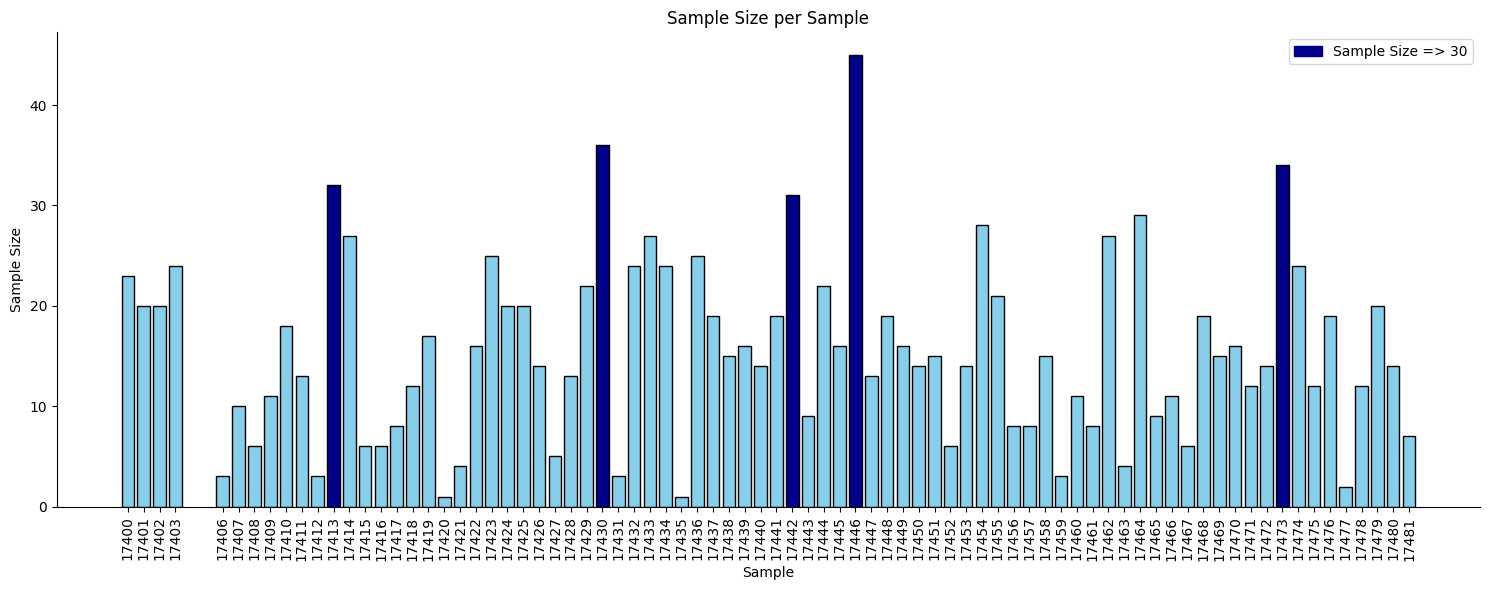

In [75]:
import matplotlib.pyplot as plt

# Create a bar chart using the observation_count_per_sample_id dataframe
plt.figure(figsize=(15, 6))  # Adjust the figure size to 10 inches wide and 6 inches tall
bars = plt.bar(x=observation_count_per_sample_id['sample_id'], height=observation_count_per_sample_id['observation_count'], edgecolor='black', linewidth=1)
for i, bar in enumerate(bars):
    if observation_count_per_sample_id['observation_count'][i] >= 30:
        bar.set_color('darkblue')  # Set the color of each bar to dark blue if observation count is >= 30
    else:
        bar.set_color('skyblue')  # Set the color of each bar to pastel blue if observation count is < 30
    bar.set_edgecolor('black')  # Set the edge color of each bar to black
    bar.set_linewidth(1)  # Set the linewidth of each bar to 1
    bar.set_capstyle('round')  # Set the top of the bar shape to rounded corner
plt.xlabel('Sample')
plt.ylabel('Sample Size')
plt.title('Sample Size per Sample')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the spacing between subplots to prevent labels from being cut off
plt.xticks(sorted(observation_count_per_sample_id['sample_id']))  # Show all xticks labels in ascending order

# Add legend
legend = plt.legend(['Sample Size => 30'], loc='upper right')
legend.legendHandles[0].set_color('darkblue')  # Set the color of the legend to dark blue

# Remove chart outline
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.show()

decide whether to look only at sample that have a sampe size => 30 

In [81]:
import matplotlib.pyplot as plt

# Group the clean_df by sample_id and sum the binary columns
stacked_df = clean_df.[['sample_id']['sex_binary']].sum()

# Define custom colors based on the sex binary column
colors = ['darkblue' if val == 0 else 'lightblue' for val in stacked_df['sex_binary']]

# Plot the stacked columns with custom colors
stacked_df.plot(kind='bar', stacked=True, color=colors)

# Add labels and title to the plot
plt.xlabel('Sample ID')
plt.ylabel('Count')
plt.title('Stacked Columns per Sample ID')

# Show the plot
plt.show()

SyntaxError: invalid syntax (4264259465.py, line 4)

In [83]:
stacked_df


,sex_binary
sample_id,
17400,20
17401,12
17402,17
17403,23
17406,3
...,...
17477,2
17478,10
17479,19
